In [1]:
# Import all necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the Dataset
HD_df = pd.read_csv(r"/Users/payalchavan/Documents/DataMining_Assignments/MidTerm1/heart_disease_uci.csv")
HD_df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
# Drop unnecessary columns
HD_df.drop(columns=["id", "dataset"], axis=1, inplace=True)
HD_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,58,Male,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
# Take a look at the data structure
HD_df.shape

(920, 14)

In [5]:
HD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


In [6]:
# Summary Statistics
HD_df.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [7]:
# Checking for missing values in the dataset
HD_df.isnull().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [8]:
# Fill missing values in the dataset
from sklearn.impute import SimpleImputer

# Impute missing values for numerical features
numerical_imputer = SimpleImputer(strategy="mean") 
numerical_features = ["trestbps", "chol", "thalch", "oldpeak", "ca"]
HD_df[numerical_features] = numerical_imputer.fit_transform(HD_df[numerical_features])

# Impute missing values for categorical features
categorical_imputer = SimpleImputer(strategy="most_frequent")
categorical_features = ["fbs", "restecg", "exang", "slope", "thal"]
HD_df[categorical_features] = categorical_imputer.fit_transform(HD_df[categorical_features])

# Final check for missing values
HD_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [9]:
# Checking for duplicate records in the dataset
HD_df.duplicated().any()

True

In [10]:
# Find and print duplicate records
duplicate_records = HD_df[HD_df.duplicated(keep=False)]
print(duplicate_records)

     age     sex               cp  trestbps        chol    fbs  \
404   49  Female  atypical angina     110.0  199.130337  False   
405   49  Female  atypical angina     110.0  199.130337  False   
859   58    Male      non-anginal     150.0  219.000000  False   
907   58    Male      non-anginal     150.0  219.000000  False   

              restecg  thalch  exang  oldpeak slope        ca    thal  num  
404            normal   160.0  False      0.0  flat  0.676375  normal    0  
405            normal   160.0  False      0.0  flat  0.676375  normal    0  
859  st-t abnormality   118.0   True      0.0  flat  0.676375  normal    2  
907  st-t abnormality   118.0   True      0.0  flat  0.676375  normal    2  


In [11]:
# Remove duplicate rows, keeping only the first occurrence
HD_df.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.000000,fixed defect,0
1,67,Male,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.000000,normal,2
2,67,Male,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,flat,2.000000,reversable defect,1
3,37,Male,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.000000,normal,0
4,41,Female,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.000000,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,flat,0.676375,normal,1
916,62,Male,typical angina,132.132404,139.0,False,st-t abnormality,137.545665,False,0.878788,flat,0.676375,normal,0
917,55,Male,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,flat,0.676375,fixed defect,2
918,58,Male,asymptomatic,132.132404,385.0,True,lv hypertrophy,137.545665,False,0.878788,flat,0.676375,normal,0


## TASK 1: Data Visualization

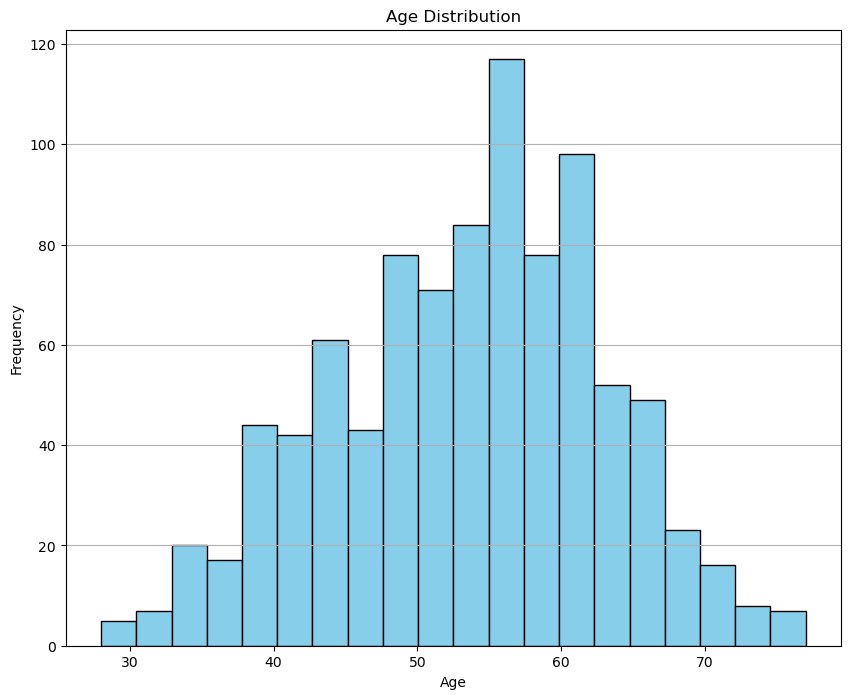

In [13]:
# Plot a histogram for the distribution of age
plt.figure(figsize=(10, 8))
plt.hist(HD_df["age"], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.grid(axis="y")
plt.show()

Insights: From the above given histogram, we can note that the maximum age distribution falls between 55-58.The bar for this particular age range is highest. There is some significant downfall for the ages below 45 and above 60. Therefore, we can conclude that the age distribution majorly falls under middle-aged people.  

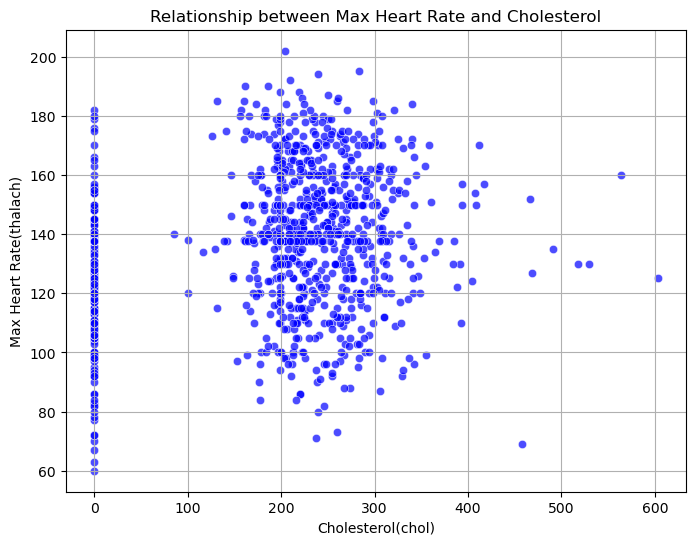

In [15]:
# Plot a scatter plot to check the relationship between max heart rate(thalch) and cholesterol(chol)
plt.figure(figsize=(8, 6))
sns.scatterplot(x="chol", y="thalch", data=HD_df, color="blue", alpha=0.7)
plt.xlabel("Cholesterol(chol)")
plt.ylabel("Max Heart Rate(thalach)")
plt.title("Relationship between Max Heart Rate and Cholesterol")
plt.grid()
plt.show()

Insights: From the above scatter plot, we can observe that as the cholestrol level increases, the heart rate also increases. So these two characteristics are directly proportional to each other. Also, there are some outliers spotted , which may denote that the measuremeants might be wrong. Also there is a strong correlation between the cholestrol levels and heart rate. 

## TASK 2: Dimensional Reduction with PCA

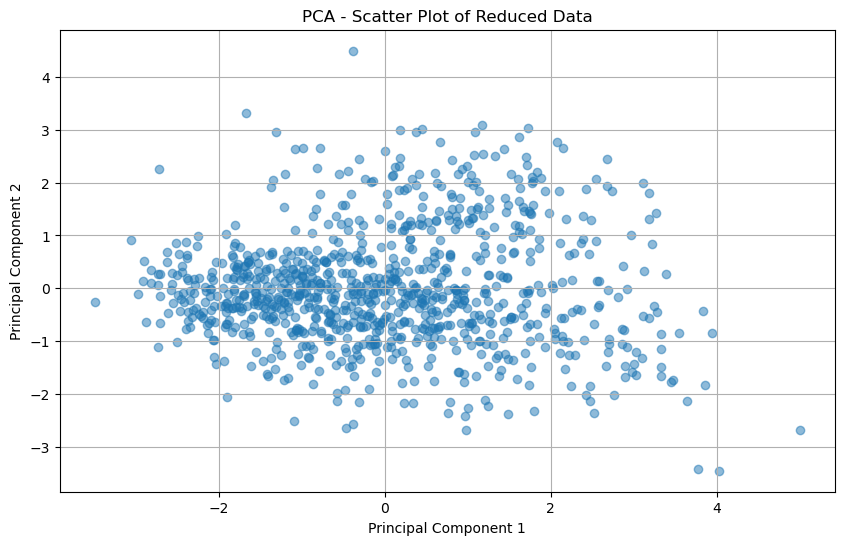

Explained variance ratio of PC1: 0.31755675430385766
Explained variance ratio of PC2: 0.17132502082818873


In [18]:
# Drop non-numeric columns
numeric_df = HD_df.drop(columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'])
 
# Standardize the data
scaler = StandardScaler()
scaled_data_uci = scaler.fit_transform(numeric_df)
 
# Apply PCA
pca_uci = PCA(n_components=2)
principal_components_uci = pca_uci.fit_transform(scaled_data_uci)
 
# Create a DataFrame with the principal components
principal_df_uci = pd.DataFrame(data=principal_components_uci, columns=['PC1', 'PC2'])
 
# Visualize the reduced data on a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(principal_df_uci['PC1'], principal_df_uci['PC2'], alpha=0.5)
plt.title('PCA - Scatter Plot of Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
 
# Interpretation of the first two principal components
print("Explained variance ratio of PC1:", pca_uci.explained_variance_ratio_[0])
print("Explained variance ratio of PC2:", pca_uci.explained_variance_ratio_[1])

Insights: From the above PCA Analysis, we can notice the explained variance ratio for PC1 is higher than PC2.

## TASK 3: Regression Model 

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# Standardize your dataset
scaler = StandardScaler()
HD_df[['age', 'trestbps', 'chol']] = scaler.fit_transform(HD_df[['age', 'trestbps', 'chol']])

In [23]:
# Selecting features and target variable
X = HD_df[['age', 'trestbps', 'chol']]
y = HD_df['thalch']

In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating RMSE 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculating R2 
r2 = r2_score(y_test, y_pred)

# Compute RMSE and R2
print(f"RMSE: {rmse:.2f}")
print(f"R-sqaured: {r2:.2f}")

RMSE: 23.16
R-sqaured: 0.11


Insights: An RMSE of 23.16 means, on average, our predictions are off by 23.16 units. Lower RMSE values indicate better performance. An R-sqaured of 0.11 suggests that only 11% of the variance in the outcome variable is explained by our model, which isn’t great. Generally, we want this value to be closer to 1.

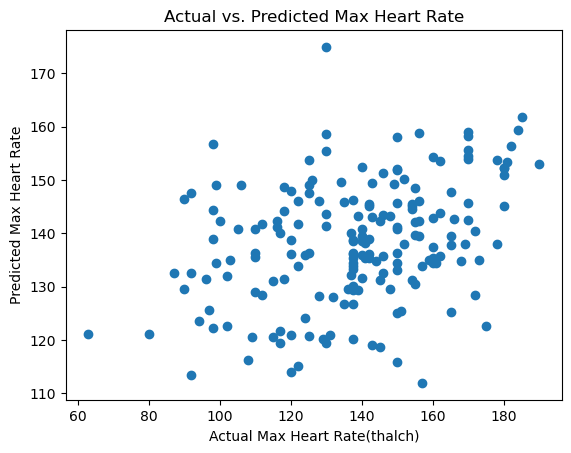

In [26]:
# Plot actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Max Heart Rate(thalch)")
plt.ylabel("Predicted Max Heart Rate")
plt.title("Actual vs. Predicted Max Heart Rate")
plt.show()

Insights: The spread of the points indicates that while some predictions are close to the actual values, others are significantly off. This suggests the model's predictions are inconsistent. The y-axis range starting from 110 suggests that the model rarely predicts values below 110, which might indicate a bias in our model towards predicting higher heart rates.

## TASK 4: Classification with Logistic Regression and K-NN

In [29]:
# Preprocess data: One-hot encode 'sex' and 'cp'
HD_df = pd.get_dummies(HD_df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], drop_first=True)

In [30]:
# Split the dataset into training and testing sets
X = HD_df.drop(columns=['num'])
y = HD_df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Normalize numerical variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Initialize logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [33]:
# Initialize K-NN classifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
# Make predictions
y_pred_logreg = logreg_model.predict(X_test_scaled)
y_pred_knn = knn_model.predict(X_test_scaled)

In [35]:
# Evaluate models
def evaluate_model(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted')
    rec = recall_score(y_true, y_pred, average='weighted')
    return acc, prec, rec

In [36]:
acc_logreg, prec_logreg, rec_logreg = evaluate_model(y_test, y_pred_logreg)
acc_knn, prec_knn, rec_knn = evaluate_model(y_test, y_pred_knn)

In [37]:
print("Logistic Regression:")
print(f"Accuracy: {acc_logreg:.2f}, Precision: {prec_logreg:.2f}, Recall: {rec_logreg:.2f}")

Logistic Regression:
Accuracy: 0.54, Precision: 0.48, Recall: 0.54


In [38]:
print("\nK-NN Classifier:")
print(f"Accuracy: {acc_knn:.2f}, Precision: {prec_knn:.2f}, Recall: {rec_knn:.2f}")


K-NN Classifier:
Accuracy: 0.54, Precision: 0.48, Recall: 0.54


In [39]:
# Confusion matrix for logistic regression
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print("\nConfusion Matrix (Logistic Regression):")
print(conf_matrix_logreg)


Confusion Matrix (Logistic Regression):
[[64 11  0  0  0]
 [22 29  0  3  0]
 [ 3 14  3  5  0]
 [ 5 10  6  3  2]
 [ 0  1  1  2  0]]


In [40]:
# Confusion matrix for K-NN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion Matrix (K-NN Classifier):")
print(conf_matrix_knn)


Confusion Matrix (K-NN Classifier):
[[66  9  0  0  0]
 [21 27  5  1  0]
 [ 6 12  3  4  0]
 [ 7 12  4  3  0]
 [ 1  1  2  0  0]]


Insights: Both classifiers Logistic Regression and K-NN have the same overall metrics, but their confusion matrices reveal minor differences in their predictions.
Logistic Regression and K-NN both have the same accuracy, precision, and recall, but their specific predictions (TP, TN, FP, FN) slightly vary, influencing the individual outcomes.

## TASK 5: Performance Evaluation

In [43]:
# Get the predicted probabilities for the positive class
knn_probs = knn_model.predict_proba(X_test_scaled)[:, 1]
log_reg_probs = logreg_model.predict_proba(X_test_scaled)[:, 1]

In [44]:
# Calculate ROC curve and AUC for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs, pos_label=1)
roc_auc_knn = auc(fpr_knn, tpr_knn)

In [45]:
# Calculate ROC curve and AUC for Logistic Regression
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg_probs, pos_label=1)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

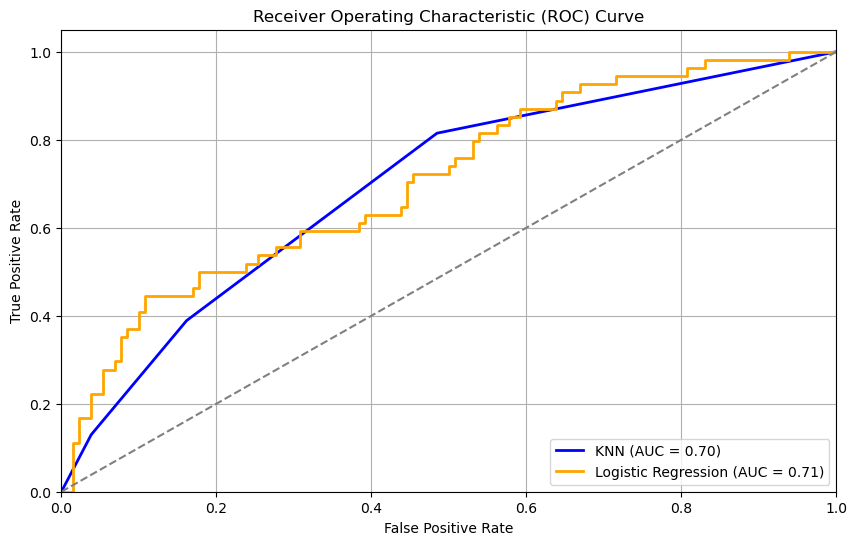

In [46]:
# Plotting the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_log_reg, tpr_log_reg, color='orange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_log_reg)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Insights: Both models perform better than a random classifier, as indicated by their AUC values being greater than 0.5.
The Logistic Regression model has a slightly higher AUC (0.71) compared to the KNN model (0.70), suggesting that Logistic Regression has a marginally better overall performance in distinguishing between the positive and negative classes.
The ROC curve helps in visualizing the trade-off between the True Positive Rate and False Positive Rate for different thresholds, aiding in the selection of an optimal threshold for classification.
So, in essence, Logistic Regression seems to edge out KNN here—though it's a pretty close call.